In [1]:
# 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

In [3]:
#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

In [7]:
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [8]:
#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.1918
Epoch: 0002 Avg. cost = 0.0572
Epoch: 0003 Avg. cost = 0.0464
Epoch: 0004 Avg. cost = 0.0413
Epoch: 0005 Avg. cost = 0.0384
Epoch: 0006 Avg. cost = 0.0366
Epoch: 0007 Avg. cost = 0.0343
Epoch: 0008 Avg. cost = 0.0333
Epoch: 0009 Avg. cost = 0.0328
Epoch: 0010 Avg. cost = 0.0322
Epoch: 0011 Avg. cost = 0.0315
Epoch: 0012 Avg. cost = 0.0308
Epoch: 0013 Avg. cost = 0.0303
Epoch: 0014 Avg. cost = 0.0292
Epoch: 0015 Avg. cost = 0.0289
Epoch: 0016 Avg. cost = 0.0287
Epoch: 0017 Avg. cost = 0.0274
Epoch: 0018 Avg. cost = 0.0271
Epoch: 0019 Avg. cost = 0.0267
Epoch: 0020 Avg. cost = 0.0258
최적화 완료!


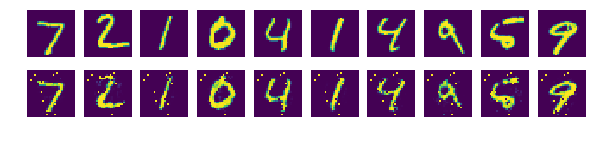

In [9]:
#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()